# Investigate MI pulse train peak powers

## Import libraries and define fiber

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from ssfm_functions import *
from scipy.signal import find_peaks
import pandas as pd
from time import time, sleep
N  = 2**14 #Number of points
dt = 0.1e-12 #Time resolution [s] 

timeFreq_test=timeFreq_class(N,dt)


#Define fiber parameters
Length          = 500      #Fiber length in m

gamma           = 40e-3     #Nonlinearity parameter in 1/W/m 
beta2           = -100e3    #Dispersion in fs^2/m (units typically used when referring to beta2) 
beta2          *= (1e-30)  #Convert fs^2 to s^2 so everything is in SI units
alpha_dB_per_m  = 0.0e-3   #Power attenuation coeff in decibel per m. Usual value at 1550nm is 0.2 dB/km

#Note:  beta2>0 is normal dispersion with red light pulling ahead, 
#       causing a negative leading chirp
#       
#       beta2<0 is anormalous dispersion with blue light pulling ahead, 
#       causing a positive leading chirp.



#  Initialize class
fiber=Fiber_class(Length, gamma, beta2, alpha_dB_per_m)

#Define step config
MI_stepConfig=("fixed",2**11)

### Configuration Parameters ###
 Number of points = 16384
 Start time, tmin = -819.2ps
 Stop time, tmax = 819.2ps
 Time resolution, dt = 0.1ps
  
 Start frequency= -4.999694824217917THz
 Stop frequency = 4.99908450990832THz
 Frequency resolution= 610.3143095966797MHz
   
-271.0577976703644


## Define noisy pulse, propagate through fiber and record peak powers

In [170]:
testAmplitude              = 1                            #Amplitude in units of sqrt(W)
testDuration               = 2000*timeFreq_test.time_step #Pulse 1/e^2 duration [s]
testOffset                 = 0                            #Time offset
testChirp                  = 0                            #Chirp factor
testCarrierFreq            = 0                            #Freq. offset
testPulseType              = 'gaussian'                   #'Gaussian', 'square', 'sech'
testOrder                  = 1                            #Order of Gaussian pulse
testNoiseAmplitude         = testAmplitude* 1e-3          #Added ASE noise amplitude

number_of_runs = 3200

#Add new peak powers to previous list of peak powers
resultArray=np.array(  pd.read_csv("peakValues_MI.csv")  )

#Monitor runtime
t_start=time()
t_so_far=t_start
t_this_run=0.0

#Begin loop over runs
for i in range(number_of_runs):
    print(' ')
    print(f"Run number {i} out of {number_of_runs}. {np.floor(i/number_of_runs*100)}% done")
    
    #Generate new noisy pulse
    testInputSignal = input_signal_class(timeFreq_test, 
                                     testAmplitude ,
                                     testDuration,
                                     testOffset,
                                     testChirp,
                                     testCarrierFreq,
                                     testPulseType,
                                     testOrder,
                                     testNoiseAmplitude)
    
    #Run SSFM
    ssfm_result_test = SSFM(fiber,testInputSignal,stepConfig=MI_stepConfig)
    
    #Extract results close to peak of input pulse, where light is almost CW
    nrange_pulse=800
    cutoff_pulse=-30
    chirpPlotRange_pulse=(-100,100)
    matrix = ssfm_result_test.pulseMatrix 
    P_final=getPower(matrix[-1,int(ssfm_result_test.timeFreq.number_of_points/2-nrange_pulse):int(ssfm_result_test.timeFreq.number_of_points/2+nrange_pulse)])
    
    #Extract indices of peak powers using scipy.signal.find_peaks
    peak_indices,_ = find_peaks(P_final,height=(0.25,10000),width = 5)    
    
    #Extract peak powers and save to array
    peakPowers=P_final[peak_indices]
    resultArray=np.append(resultArray,peakPowers)
    
    #Print time info and do next SSFM run
    t_this_run = time()- t_so_far
    t_so_far += t_this_run 
    
    print(f"This run took {t_this_run}s = {t_this_run/60}min = {t_this_run/60/60}h ")
    print(f"Time so far = {t_so_far}s = {t_so_far/60}min = {t_so_far/60/60}h ")

#Finished loop
t_end=time()
t_run = t_end-t_start
print(' ')
print(f"Running SSFM {number_of_runs} times took {t_run}s = {t_run/60}min = {t_run/60/60}h")
print(f"That is an average of {t_run/number_of_runs}s = {t_run/60/number_of_runs}min = {t_run/60/60/number_of_runs}h per run")
print(' ')

#Save results to .csv file
print("Finished simulating everyting. Saving results")
df=pd.DataFrame(resultArray)
df.to_csv('peakValues_MI.csv',index=False)


 
Run number 0 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 8.706723690032959s = 0.1451120615005493min = 0.0024185343583424885h 
 
Run number 1 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 8.400758028030396s = 0.1400126338005066min = 0.00233354389667511h 
 
Run number 2 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 8.542847633361816s = 0.14238079388936362min = 0.0023730132314893934h 
 
Run number 3 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 8.528320074081421s = 0.142138667901357min = 0.0023689777983559503h 
 
Run number 4 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 8.998327732086182s = 0.14997212886810302min = 0.0024995354811350504h 
 
Run number 5 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 9.174570798873901s = 0.152909513314565min = 0.0025484918885760833h 
 
Run number 6 out of 3200. 0.0% done
Finished running SSFM!!!
This run took 10.496504783630371s = 0.17494174639383953min = 0.

Finished running SSFM!!!
This run took 10.253228902816772s = 0.17088714838027955min = 0.002848119139671326h 
 
Run number 57 out of 3200. 1.0% done
Finished running SSFM!!!
This run took 9.832637786865234s = 0.1638772964477539min = 0.0027312882741292316h 
 
Run number 58 out of 3200. 1.0% done
Finished running SSFM!!!
This run took 12.773011922836304s = 0.21288353204727173min = 0.003548058867454529h 
 
Run number 59 out of 3200. 1.0% done
Finished running SSFM!!!
This run took 10.788739442825317s = 0.17981232404708863min = 0.0029968720674514774h 
 
Run number 60 out of 3200. 1.0% done
Finished running SSFM!!!
This run took 9.634498834609985s = 0.1605749805768331min = 0.0026762496762805514h 
 
Run number 61 out of 3200. 1.0% done
Finished running SSFM!!!
This run took 11.968616485595703s = 0.19947694142659506min = 0.003324615690443251h 
 
Run number 62 out of 3200. 1.0% done
Finished running SSFM!!!
This run took 9.254209995269775s = 0.15423683325449625min = 0.0025706138875749374h 
 
Ru

Finished running SSFM!!!
This run took 10.433250188827515s = 0.17388750314712526min = 0.0028981250524520875h 
 
Run number 113 out of 3200. 3.0% done
Finished running SSFM!!!
This run took 11.91439151763916s = 0.19857319196065268min = 0.0033095531993442115h 
 
Run number 114 out of 3200. 3.0% done
Finished running SSFM!!!
This run took 10.082279205322266s = 0.1680379867553711min = 0.0028006331125895183h 
 
Run number 115 out of 3200. 3.0% done
Finished running SSFM!!!
This run took 9.654675483703613s = 0.16091125806172688min = 0.0026818543010287813h 
 
Run number 116 out of 3200. 3.0% done
Finished running SSFM!!!
This run took 9.962027788162231s = 0.16603379646937053min = 0.0027672299411561755h 
 
Run number 117 out of 3200. 3.0% done
Finished running SSFM!!!
This run took 10.016583681106567s = 0.1669430613517761min = 0.002782384355862935h 
 
Run number 118 out of 3200. 3.0% done
Finished running SSFM!!!
This run took 11.026684999465942s = 0.18377808332443238min = 0.003062968055407206

Finished running SSFM!!!
This run took 8.270277976989746s = 0.13783796628316244min = 0.0022972994380527074h 
 
Run number 169 out of 3200. 5.0% done
Finished running SSFM!!!
This run took 9.483584880828857s = 0.15805974801381428min = 0.0026343291335635716h 
 
Run number 170 out of 3200. 5.0% done
Finished running SSFM!!!
This run took 8.52378511428833s = 0.14206308523813885min = 0.0023677180873023142h 
 
Run number 171 out of 3200. 5.0% done
Finished running SSFM!!!
This run took 8.536107778549194s = 0.1422684629758199min = 0.0023711410495969986h 
 
Run number 172 out of 3200. 5.0% done
Finished running SSFM!!!
This run took 8.098065614700317s = 0.13496776024500529min = 0.002249462670750088h 
 
Run number 173 out of 3200. 5.0% done
Finished running SSFM!!!
This run took 9.28493070602417s = 0.15474884510040282min = 0.002579147418340047h 
 
Run number 174 out of 3200. 5.0% done
Finished running SSFM!!!
This run took 7.941452980041504s = 0.1323575496673584min = 0.0022059591611226404h 
 
R

Finished running SSFM!!!
This run took 18.2421293258667s = 0.30403548876444497min = 0.005067258146074083h 
 
Run number 225 out of 3200. 7.0% done
Finished running SSFM!!!
This run took 13.964553356170654s = 0.23274255593617757min = 0.003879042598936293h 
 
Run number 226 out of 3200. 7.0% done
Finished running SSFM!!!
This run took 13.332271575927734s = 0.22220452626546225min = 0.0037034087710910374h 
 
Run number 227 out of 3200. 7.0% done
Finished running SSFM!!!
This run took 18.40723466873169s = 0.30678724447886146min = 0.005113120741314358h 
 
Run number 228 out of 3200. 7.0% done
Finished running SSFM!!!
This run took 16.39994239807129s = 0.27333237330118815min = 0.004555539555019803h 
 
Run number 229 out of 3200. 7.0% done
Finished running SSFM!!!
This run took 15.857359886169434s = 0.26428933143615724min = 0.004404822190602621h 
 
Run number 230 out of 3200. 7.0% done
Finished running SSFM!!!
This run took 17.160282611846924s = 0.2860047101974487min = 0.004766745169957479h 
 

Finished running SSFM!!!
This run took 8.63772702217102s = 0.14396211703618367min = 0.0023993686172697278h 
 
Run number 281 out of 3200. 8.0% done
Finished running SSFM!!!
This run took 7.973479270935059s = 0.13289132118225097min = 0.0022148553530375163h 
 
Run number 282 out of 3200. 8.0% done
Finished running SSFM!!!
This run took 9.172432899475098s = 0.1528738816579183min = 0.0025478980276319716h 
 
Run number 283 out of 3200. 8.0% done
Finished running SSFM!!!
This run took 8.432515859603882s = 0.14054193099339804min = 0.002342365516556634h 
 
Run number 284 out of 3200. 8.0% done
Finished running SSFM!!!
This run took 8.893006086349487s = 0.1482167681058248min = 0.002470279468430413h 
 
Run number 285 out of 3200. 8.0% done
Finished running SSFM!!!
This run took 7.8648951053619385s = 0.13108158508936565min = 0.002184693084822761h 
 
Run number 286 out of 3200. 8.0% done
Finished running SSFM!!!
This run took 8.210802793502808s = 0.1368467132250468min = 0.00228077855375078h 
 
Run

Finished running SSFM!!!
This run took 12.649307012557983s = 0.21082178354263306min = 0.0035136963923772177h 
 
Run number 337 out of 3200. 10.0% done
Finished running SSFM!!!
This run took 13.229268312454224s = 0.2204878052075704min = 0.0036747967534595063h 
 
Run number 338 out of 3200. 10.0% done
Finished running SSFM!!!
This run took 12.055872201919556s = 0.20093120336532594min = 0.003348853389422099h 
 
Run number 339 out of 3200. 10.0% done
Finished running SSFM!!!
This run took 12.112804651260376s = 0.20188007752100626min = 0.0033646679586834378h 
 
Run number 340 out of 3200. 10.0% done
Finished running SSFM!!!
This run took 14.537188529968262s = 0.24228647549947102min = 0.0040381079249911835h 
 
Run number 341 out of 3200. 10.0% done
Finished running SSFM!!!
This run took 12.169688940048218s = 0.20282814900080362min = 0.0033804691500133937h 
 
Run number 342 out of 3200. 10.0% done
Finished running SSFM!!!
This run took 12.839360475540161s = 0.21398934125900268min = 0.00356648

Finished running SSFM!!!
This run took 10.00008749961853s = 0.16666812499364217min = 0.0027778020832273697h 
 
Run number 392 out of 3200. 12.0% done
Finished running SSFM!!!
This run took 10.3303804397583s = 0.17217300732930502min = 0.0028695501221550836h 
 
Run number 393 out of 3200. 12.0% done
Finished running SSFM!!!
This run took 10.603179931640625s = 0.17671966552734375min = 0.0029453277587890626h 
 
Run number 394 out of 3200. 12.0% done
Finished running SSFM!!!
This run took 9.018147706985474s = 0.15030246178309123min = 0.002505041029718187h 
 
Run number 395 out of 3200. 12.0% done
Finished running SSFM!!!
This run took 12.22140097618103s = 0.20369001626968383min = 0.0033948336044947306h 
 
Run number 396 out of 3200. 12.0% done
Finished running SSFM!!!
This run took 10.82052993774414s = 0.18034216562906902min = 0.003005702760484484h 
 
Run number 397 out of 3200. 12.0% done
Finished running SSFM!!!
This run took 9.47185730934143s = 0.15786428848902384min = 0.0026310714748170

Finished running SSFM!!!
This run took 7.052720785140991s = 0.11754534641901652min = 0.001959089106983609h 
 
Run number 447 out of 3200. 13.0% done
Finished running SSFM!!!
This run took 9.32838773727417s = 0.1554731289545695min = 0.0025912188159094916h 
 
Run number 448 out of 3200. 14.0% done
Finished running SSFM!!!
This run took 6.932013273239136s = 0.11553355455398559min = 0.0019255592425664264h 
 
Run number 449 out of 3200. 14.0% done
Finished running SSFM!!!
This run took 7.240344047546387s = 0.12067240079243978min = 0.0020112066798739963h 
 
Run number 450 out of 3200. 14.0% done
Finished running SSFM!!!
This run took 6.890291690826416s = 0.11483819484710693min = 0.0019139699141184489h 
 
Run number 451 out of 3200. 14.0% done
Finished running SSFM!!!
This run took 6.908492803573608s = 0.11514154672622681min = 0.0019190257787704468h 
 
Run number 452 out of 3200. 14.0% done
Finished running SSFM!!!
This run took 7.2246174812316895s = 0.12041029135386148min = 0.002006838189231

Finished running SSFM!!!
This run took 7.002360820770264s = 0.1167060136795044min = 0.0019451002279917398h 
 
Run number 502 out of 3200. 15.0% done
Finished running SSFM!!!
This run took 6.824994802474976s = 0.11374991337458293min = 0.0018958318895763821h 
 
Run number 503 out of 3200. 15.0% done
Finished running SSFM!!!
This run took 7.0024635791778564s = 0.11670772631963094min = 0.001945128771993849h 
 
Run number 504 out of 3200. 15.0% done
Finished running SSFM!!!
This run took 6.855664491653442s = 0.11426107486089071min = 0.001904351247681512h 
 
Run number 505 out of 3200. 15.0% done
Finished running SSFM!!!
This run took 7.134948492050171s = 0.11891580820083618min = 0.001981930136680603h 
 
Run number 506 out of 3200. 15.0% done
Finished running SSFM!!!
This run took 6.883592128753662s = 0.1147265354792277min = 0.001912108924653795h 
 
Run number 507 out of 3200. 15.0% done
Finished running SSFM!!!
This run took 6.897279977798462s = 0.11495466629664103min = 0.001915911104944017

Finished running SSFM!!!
This run took 6.824032306671143s = 0.11373387177785238min = 0.001895564529630873h 
 
Run number 557 out of 3200. 17.0% done
Finished running SSFM!!!
This run took 7.0384156703948975s = 0.11730692783991496min = 0.0019551154639985825h 
 
Run number 558 out of 3200. 17.0% done
Finished running SSFM!!!
This run took 7.435540199279785s = 0.12392566998799642min = 0.0020654278331332736h 
 
Run number 559 out of 3200. 17.0% done
Finished running SSFM!!!
This run took 7.83749532699585s = 0.13062492211659749min = 0.002177082035276625h 
 
Run number 560 out of 3200. 17.0% done
Finished running SSFM!!!
This run took 6.941601753234863s = 0.1156933625539144min = 0.0019282227092319065h 
 
Run number 561 out of 3200. 17.0% done
Finished running SSFM!!!
This run took 7.506986379623413s = 0.1251164396603902min = 0.002085273994339837h 
 
Run number 562 out of 3200. 17.0% done
Finished running SSFM!!!
This run took 7.311656951904297s = 0.12186094919840494min = 0.002031015819973415

Finished running SSFM!!!
This run took 6.830458879470825s = 0.11384098132451376min = 0.001897349688741896h 
 
Run number 612 out of 3200. 19.0% done
Finished running SSFM!!!
This run took 7.2272796630859375s = 0.1204546610514323min = 0.0020075776841905384h 
 
Run number 613 out of 3200. 19.0% done
Finished running SSFM!!!
This run took 7.196626424789429s = 0.11994377374649048min = 0.0019990628957748413h 
 
Run number 614 out of 3200. 19.0% done
Finished running SSFM!!!
This run took 9.137117385864258s = 0.1522852897644043min = 0.002538088162740072h 
 
Run number 615 out of 3200. 19.0% done
Finished running SSFM!!!
This run took 7.001350164413452s = 0.11668916940689086min = 0.0019448194901148478h 
 
Run number 616 out of 3200. 19.0% done
Finished running SSFM!!!
This run took 7.140347003936768s = 0.11900578339894613min = 0.001983429723315769h 
 
Run number 617 out of 3200. 19.0% done
Finished running SSFM!!!
This run took 6.831536769866943s = 0.11385894616444905min = 0.00189764910274081

Finished running SSFM!!!
This run took 6.834870338439941s = 0.11391450564066569min = 0.0018985750940110947h 
 
Run number 667 out of 3200. 20.0% done
Finished running SSFM!!!
This run took 7.008140802383423s = 0.11680234670639038min = 0.0019467057784398397h 
 
Run number 668 out of 3200. 20.0% done
Finished running SSFM!!!
This run took 6.8906989097595215s = 0.11484498182932536min = 0.0019140830304887559h 
 
Run number 669 out of 3200. 20.0% done
Finished running SSFM!!!
This run took 7.109708786010742s = 0.11849514643351237min = 0.001974919107225206h 
 
Run number 670 out of 3200. 20.0% done
Finished running SSFM!!!
This run took 6.8190836906433105s = 0.11365139484405518min = 0.0018941899140675863h 
 
Run number 671 out of 3200. 20.0% done
Finished running SSFM!!!
This run took 6.925584316253662s = 0.11542640527089437min = 0.0019237734211815728h 
 
Run number 672 out of 3200. 21.0% done
Finished running SSFM!!!
This run took 6.7958691120147705s = 0.11326448520024618min = 0.00188774142

Finished running SSFM!!!
This run took 6.840785503387451s = 0.11401309172312418min = 0.0019002181953854031h 
 
Run number 722 out of 3200. 22.0% done
Finished running SSFM!!!
This run took 7.0547261238098145s = 0.11757876873016357min = 0.001959646145502726h 
 
Run number 723 out of 3200. 22.0% done
Finished running SSFM!!!
This run took 6.8362202644348145s = 0.11393700440724691min = 0.0018989500734541151h 
 
Run number 724 out of 3200. 22.0% done
Finished running SSFM!!!
This run took 6.904618501663208s = 0.11507697502772013min = 0.0019179495837953356h 
 
Run number 725 out of 3200. 22.0% done
Finished running SSFM!!!
This run took 6.947593688964844s = 0.11579322814941406min = 0.0019298871358235678h 
 
Run number 726 out of 3200. 22.0% done
Finished running SSFM!!!
This run took 6.907782793045044s = 0.1151297132174174min = 0.0019188285536236233h 
 
Run number 727 out of 3200. 22.0% done
Finished running SSFM!!!
This run took 7.059082508087158s = 0.11765137513478598min = 0.0019608562522

Finished running SSFM!!!
This run took 6.907535076141357s = 0.11512558460235596min = 0.0019187597433725993h 
 
Run number 777 out of 3200. 24.0% done
Finished running SSFM!!!
This run took 6.906940698623657s = 0.11511567831039429min = 0.0019185946385065716h 
 
Run number 778 out of 3200. 24.0% done
Finished running SSFM!!!
This run took 7.145935535430908s = 0.11909892559051513min = 0.0019849820931752524h 
 
Run number 779 out of 3200. 24.0% done
Finished running SSFM!!!
This run took 7.2267327308654785s = 0.12044554551442464min = 0.002007425758573744h 
 
Run number 780 out of 3200. 24.0% done
Finished running SSFM!!!
This run took 7.8113861083984375s = 0.1301897684733073min = 0.0021698294745551216h 
 
Run number 781 out of 3200. 24.0% done
Finished running SSFM!!!
This run took 6.924589157104492s = 0.11540981928507486min = 0.001923496988084581h 
 
Run number 782 out of 3200. 24.0% done
Finished running SSFM!!!
This run took 7.161505460739136s = 0.11935842434565226min = 0.00198930707242

Finished running SSFM!!!
This run took 7.036529541015625s = 0.11727549235026041min = 0.0019545915391710068h 
 
Run number 832 out of 3200. 26.0% done
Finished running SSFM!!!
This run took 7.021078824996948s = 0.1170179804166158min = 0.0019502996736102634h 
 
Run number 833 out of 3200. 26.0% done
Finished running SSFM!!!
This run took 6.938521862030029s = 0.11564203103383382min = 0.0019273671838972303h 
 
Run number 834 out of 3200. 26.0% done
Finished running SSFM!!!
This run took 7.466841459274292s = 0.12444735765457153min = 0.0020741226275761923h 
 
Run number 835 out of 3200. 26.0% done
Finished running SSFM!!!
This run took 6.8300628662109375s = 0.11383438110351562min = 0.0018972396850585938h 
 
Run number 836 out of 3200. 26.0% done
Finished running SSFM!!!
This run took 7.205475807189941s = 0.12009126345316569min = 0.0020015210575527616h 
 
Run number 837 out of 3200. 26.0% done
Finished running SSFM!!!
This run took 7.679058313369751s = 0.1279843052228292min = 0.00213307175371

Finished running SSFM!!!
This run took 7.015138149261475s = 0.11691896915435791min = 0.0019486494859059652h 
 
Run number 887 out of 3200. 27.0% done
Finished running SSFM!!!
This run took 6.903167247772217s = 0.11505278746287027min = 0.0019175464577145045h 
 
Run number 888 out of 3200. 27.0% done
Finished running SSFM!!!
This run took 7.136023044586182s = 0.1189337174097697min = 0.0019822286234961618h 
 
Run number 889 out of 3200. 27.0% done
Finished running SSFM!!!
This run took 6.900847434997559s = 0.11501412391662598min = 0.0019169020652770998h 
 
Run number 890 out of 3200. 27.0% done
Finished running SSFM!!!
This run took 7.239090204238892s = 0.12065150340398152min = 0.002010858390066359h 
 
Run number 891 out of 3200. 27.0% done
Finished running SSFM!!!
This run took 6.856658220291138s = 0.1142776370048523min = 0.001904627283414205h 
 
Run number 892 out of 3200. 27.0% done
Finished running SSFM!!!
This run took 7.0441296100616455s = 0.11740216016769409min = 0.0019567026694615

Finished running SSFM!!!
This run took 6.818793296813965s = 0.11364655494689942min = 0.0018941092491149903h 
 
Run number 942 out of 3200. 29.0% done
Finished running SSFM!!!
This run took 6.965641498565674s = 0.11609402497609457min = 0.0019349004162682428h 
 
Run number 943 out of 3200. 29.0% done
Finished running SSFM!!!
This run took 6.797489166259766s = 0.11329148610432943min = 0.0018881914350721571h 
 
Run number 944 out of 3200. 29.0% done
Finished running SSFM!!!
This run took 7.067752361297607s = 0.11779587268829346min = 0.001963264544804891h 
 
Run number 945 out of 3200. 29.0% done
Finished running SSFM!!!
This run took 7.022297382354736s = 0.11703828970591228min = 0.0019506381617652045h 
 
Run number 946 out of 3200. 29.0% done
Finished running SSFM!!!
This run took 6.893381595611572s = 0.11488969326019287min = 0.0019148282210032146h 
 
Run number 947 out of 3200. 29.0% done
Finished running SSFM!!!
This run took 7.111043453216553s = 0.11851739088694255min = 0.00197528984811

Finished running SSFM!!!
This run took 7.004836797714233s = 0.11674727996190389min = 0.0019457879993650647h 
 
Run number 997 out of 3200. 31.0% done
Finished running SSFM!!!
This run took 7.069960594177246s = 0.11783267656962076min = 0.001963877942827013h 
 
Run number 998 out of 3200. 31.0% done
Finished running SSFM!!!
This run took 6.795243263244629s = 0.11325405438741049min = 0.001887567573123508h 
 
Run number 999 out of 3200. 31.0% done
Finished running SSFM!!!
This run took 6.851319789886475s = 0.11418866316477458min = 0.0019031443860795764h 
 
Run number 1000 out of 3200. 31.0% done
Finished running SSFM!!!
This run took 7.014138460159302s = 0.11690230766932169min = 0.0019483717944886948h 
 
Run number 1001 out of 3200. 31.0% done
Finished running SSFM!!!
This run took 6.8399598598480225s = 0.11399933099746704min = 0.0018999888499577839h 
 
Run number 1002 out of 3200. 31.0% done
Finished running SSFM!!!
This run took 7.13870644569397s = 0.11897844076156616min = 0.001982974012

Finished running SSFM!!!
This run took 6.96446418762207s = 0.1160744031270345min = 0.001934573385450575h 
 
Run number 1052 out of 3200. 32.0% done
Finished running SSFM!!!
This run took 6.96370530128479s = 0.11606175502141317min = 0.0019343625836902194h 
 
Run number 1053 out of 3200. 32.0% done
Finished running SSFM!!!
This run took 7.051859378814697s = 0.11753098964691162min = 0.001958849827448527h 
 
Run number 1054 out of 3200. 32.0% done
Finished running SSFM!!!
This run took 6.81879997253418s = 0.113646666208903min = 0.0018941111034817167h 
 
Run number 1055 out of 3200. 32.0% done
Finished running SSFM!!!
This run took 6.997708082199097s = 0.11662846803665161min = 0.0019438078006108602h 
 
Run number 1056 out of 3200. 33.0% done
Finished running SSFM!!!
This run took 6.883760213851929s = 0.11472933689753215min = 0.0019121556149588692h 
 
Run number 1057 out of 3200. 33.0% done
Finished running SSFM!!!
This run took 7.153266429901123s = 0.11922110716501871min = 0.001987018452750

Finished running SSFM!!!
This run took 6.8349058628082275s = 0.11391509771347046min = 0.0018985849618911742h 
 
Run number 1107 out of 3200. 34.0% done
Finished running SSFM!!!
This run took 6.778504133224487s = 0.11297506888707479min = 0.0018829178147845799h 
 
Run number 1108 out of 3200. 34.0% done
Finished running SSFM!!!
This run took 7.1202921867370605s = 0.11867153644561768min = 0.0019778589407602946h 
 
Run number 1109 out of 3200. 34.0% done
Finished running SSFM!!!
This run took 6.868347406387329s = 0.11447245677312215min = 0.0019078742795520358h 
 
Run number 1110 out of 3200. 34.0% done
Finished running SSFM!!!
This run took 7.019007921218872s = 0.11698346535364787min = 0.0019497244225607979h 
 
Run number 1111 out of 3200. 34.0% done
Finished running SSFM!!!
This run took 6.810139894485474s = 0.11350233157475789min = 0.0018917055262459648h 
 
Run number 1112 out of 3200. 34.0% done
Finished running SSFM!!!
This run took 7.127694368362427s = 0.11879490613937378min = 0.00197

Finished running SSFM!!!
This run took 6.848898887634277s = 0.11414831479390462min = 0.0019024719132317437h 
 
Run number 1162 out of 3200. 36.0% done
Finished running SSFM!!!
This run took 6.899841547012329s = 0.11499735911687216min = 0.0019166226519478694h 
 
Run number 1163 out of 3200. 36.0% done
Finished running SSFM!!!
This run took 6.865951061248779s = 0.11443251768747965min = 0.0019072086281246609h 
 
Run number 1164 out of 3200. 36.0% done
Finished running SSFM!!!
This run took 6.798154592514038s = 0.11330257654190064min = 0.001888376275698344h 
 
Run number 1165 out of 3200. 36.0% done
Finished running SSFM!!!
This run took 7.095338582992554s = 0.11825564304987589min = 0.001970927384164598h 
 
Run number 1166 out of 3200. 36.0% done
Finished running SSFM!!!
This run took 6.78872537612915s = 0.11314542293548584min = 0.001885757048924764h 
 
Run number 1167 out of 3200. 36.0% done
Finished running SSFM!!!
This run took 7.051226854324341s = 0.11752044757207235min = 0.00195867412

Finished running SSFM!!!
This run took 6.890958309173584s = 0.11484930515289307min = 0.0019141550858815513h 
 
Run number 1217 out of 3200. 38.0% done
Finished running SSFM!!!
This run took 6.787568807601929s = 0.11312614679336548min = 0.0018854357798894247h 
 
Run number 1218 out of 3200. 38.0% done
Finished running SSFM!!!
This run took 7.023425579071045s = 0.11705709298451741min = 0.0019509515497419568h 
 
Run number 1219 out of 3200. 38.0% done
Finished running SSFM!!!
This run took 6.833609104156494s = 0.11389348506927491min = 0.001898224751154582h 
 
Run number 1220 out of 3200. 38.0% done
Finished running SSFM!!!
This run took 7.361900806427002s = 0.12269834677378337min = 0.002044972446229723h 
 
Run number 1221 out of 3200. 38.0% done
Finished running SSFM!!!
This run took 6.790876388549805s = 0.11318127314249675min = 0.0018863545523749457h 
 
Run number 1222 out of 3200. 38.0% done
Finished running SSFM!!!
This run took 6.999233245849609s = 0.11665388743082682min = 0.001944231

Finished running SSFM!!!
This run took 7.038233995437622s = 0.11730389992396037min = 0.001955064998732673h 
 
Run number 1272 out of 3200. 39.0% done
Finished running SSFM!!!
This run took 6.981775522232056s = 0.11636292537053426min = 0.0019393820895089043h 
 
Run number 1273 out of 3200. 39.0% done
Finished running SSFM!!!
This run took 7.064978361129761s = 0.11774963935216268min = 0.001962493989202711h 
 
Run number 1274 out of 3200. 39.0% done
Finished running SSFM!!!
This run took 6.8526880741119385s = 0.11421146790186563min = 0.001903524465031094h 
 
Run number 1275 out of 3200. 39.0% done
Finished running SSFM!!!
This run took 7.026855230331421s = 0.11711425383885701min = 0.0019519042306476169h 
 
Run number 1276 out of 3200. 39.0% done
Finished running SSFM!!!
This run took 6.858724117279053s = 0.11431206862131754min = 0.0019052011436886257h 
 
Run number 1277 out of 3200. 39.0% done
Finished running SSFM!!!
This run took 6.974738121032715s = 0.11624563535054525min = 0.001937427

Finished running SSFM!!!
This run took 6.942544937133789s = 0.11570908228556315min = 0.0019284847047593859h 
 
Run number 1327 out of 3200. 41.0% done
Finished running SSFM!!!
This run took 6.819772005081177s = 0.11366286675135294min = 0.0018943811125225489h 
 
Run number 1328 out of 3200. 41.0% done
Finished running SSFM!!!
This run took 7.028446435928345s = 0.11714077393213908min = 0.001952346232202318h 
 
Run number 1329 out of 3200. 41.0% done
Finished running SSFM!!!
This run took 6.859168291091919s = 0.11431947151819864min = 0.0019053245253033107h 
 
Run number 1330 out of 3200. 41.0% done
Finished running SSFM!!!
This run took 6.9621405601501465s = 0.11603567600250245min = 0.0019339279333750409h 
 
Run number 1331 out of 3200. 41.0% done
Finished running SSFM!!!
This run took 6.839053392410278s = 0.11398422320683797min = 0.0018997370534472996h 
 
Run number 1332 out of 3200. 41.0% done
Finished running SSFM!!!
This run took 7.324825286865234s = 0.12208042144775391min = 0.0020346

Finished running SSFM!!!
This run took 6.899860620498657s = 0.11499767700831096min = 0.001916627950138516h 
 
Run number 1382 out of 3200. 43.0% done
Finished running SSFM!!!
This run took 6.836354732513428s = 0.11393924554189046min = 0.0018989874256981744h 
 
Run number 1383 out of 3200. 43.0% done
Finished running SSFM!!!
This run took 7.060400724411011s = 0.11767334540685018min = 0.001961222423447503h 
 
Run number 1384 out of 3200. 43.0% done
Finished running SSFM!!!
This run took 6.96294641494751s = 0.11604910691579183min = 0.0019341517819298638h 
 
Run number 1385 out of 3200. 43.0% done
Finished running SSFM!!!
This run took 7.175384521484375s = 0.11958974202473958min = 0.001993162367078993h 
 
Run number 1386 out of 3200. 43.0% done
Finished running SSFM!!!
This run took 6.821152687072754s = 0.11368587811787924min = 0.0018947646352979873h 
 
Run number 1387 out of 3200. 43.0% done
Finished running SSFM!!!
This run took 6.901134490966797s = 0.11501890818277995min = 0.00191698180

Finished running SSFM!!!
This run took 7.181850433349609s = 0.11969750722249349min = 0.001994958453708225h 
 
Run number 1437 out of 3200. 44.0% done
Finished running SSFM!!!
This run took 6.849860191345215s = 0.11416433652242025min = 0.0019027389420403376h 
 
Run number 1438 out of 3200. 44.0% done
Finished running SSFM!!!
This run took 7.119211196899414s = 0.11865351994832357min = 0.001977558665805393h 
 
Run number 1439 out of 3200. 44.0% done
Finished running SSFM!!!
This run took 6.836495399475098s = 0.11394158999125163min = 0.001899026499854194h 
 
Run number 1440 out of 3200. 45.0% done
Finished running SSFM!!!
This run took 6.940899133682251s = 0.11568165222803752min = 0.0019280275371339585h 
 
Run number 1441 out of 3200. 45.0% done
Finished running SSFM!!!
This run took 6.8389732837677s = 0.11398288806279501min = 0.0018997148010465835h 
 
Run number 1442 out of 3200. 45.0% done
Finished running SSFM!!!
This run took 6.847386837005615s = 0.11412311395009359min = 0.001902051899

Finished running SSFM!!!
This run took 7.089525938034058s = 0.11815876563390096min = 0.001969312760565016h 
 
Run number 1492 out of 3200. 46.0% done
Finished running SSFM!!!
This run took 6.782053470611572s = 0.11303422451019288min = 0.0018839037418365478h 
 
Run number 1493 out of 3200. 46.0% done
Finished running SSFM!!!
This run took 7.014693737030029s = 0.11691156228383383min = 0.0019485260380638972h 
 
Run number 1494 out of 3200. 46.0% done
Finished running SSFM!!!
This run took 6.88656759262085s = 0.11477612654368083min = 0.0019129354423946805h 
 
Run number 1495 out of 3200. 46.0% done
Finished running SSFM!!!
This run took 6.983341455459595s = 0.11638902425765991min = 0.0019398170709609985h 
 
Run number 1496 out of 3200. 46.0% done
Finished running SSFM!!!
This run took 7.138890027999878s = 0.11898150046666463min = 0.001983025007777744h 
 
Run number 1497 out of 3200. 46.0% done
Finished running SSFM!!!
This run took 6.858397483825684s = 0.11430662473042806min = 0.0019051104

Finished running SSFM!!!
This run took 6.937180995941162s = 0.11561968326568603min = 0.0019269947210947672h 
 
Run number 1547 out of 3200. 48.0% done
Finished running SSFM!!!
This run took 6.943182945251465s = 0.11571971575419109min = 0.0019286619292365182h 
 
Run number 1548 out of 3200. 48.0% done
Finished running SSFM!!!
This run took 7.134049415588379s = 0.11890082359313965min = 0.0019816803932189942h 
 
Run number 1549 out of 3200. 48.0% done
Finished running SSFM!!!
This run took 6.81399393081665s = 0.11356656551361084min = 0.001892776091893514h 
 
Run number 1550 out of 3200. 48.0% done
Finished running SSFM!!!
This run took 6.840416669845581s = 0.11400694449742635min = 0.0019001157416237726h 
 
Run number 1551 out of 3200. 48.0% done
Finished running SSFM!!!
This run took 6.9738383293151855s = 0.11623063882191977min = 0.0019371773136986627h 
 
Run number 1552 out of 3200. 48.0% done
Finished running SSFM!!!
This run took 6.859611988067627s = 0.11432686646779379min = 0.00190544

Finished running SSFM!!!
This run took 6.96414041519165s = 0.11606900691986084min = 0.0019344834486643473h 
 
Run number 1602 out of 3200. 50.0% done
Finished running SSFM!!!
This run took 6.881227970123291s = 0.11468713283538819min = 0.0019114522139231365h 
 
Run number 1603 out of 3200. 50.0% done
Finished running SSFM!!!
This run took 7.038711071014404s = 0.1173118511835734min = 0.0019551975197262235h 
 
Run number 1604 out of 3200. 50.0% done
Finished running SSFM!!!
This run took 6.8618974685668945s = 0.11436495780944825min = 0.0019060826301574708h 
 
Run number 1605 out of 3200. 50.0% done
Finished running SSFM!!!
This run took 6.8214030265808105s = 0.11369005044301352min = 0.0018948341740502252h 
 
Run number 1606 out of 3200. 50.0% done
Finished running SSFM!!!
This run took 7.104619741439819s = 0.118410329023997min = 0.0019735054837332834h 
 
Run number 1607 out of 3200. 50.0% done
Finished running SSFM!!!
This run took 6.957116603851318s = 0.11595194339752198min = 0.001932532

Finished running SSFM!!!
This run took 7.006033420562744s = 0.11676722367604574min = 0.0019461203946007622h 
 
Run number 1657 out of 3200. 51.0% done
Finished running SSFM!!!
This run took 6.8123626708984375s = 0.1135393778483073min = 0.001892322964138455h 
 
Run number 1658 out of 3200. 51.0% done
Finished running SSFM!!!
This run took 6.949850559234619s = 0.11583084265391032min = 0.0019305140442318386h 
 
Run number 1659 out of 3200. 51.0% done
Finished running SSFM!!!
This run took 7.323871374130249s = 0.12206452290217082min = 0.00203440871503618h 
 
Run number 1660 out of 3200. 51.0% done
Finished running SSFM!!!
This run took 6.756657361984253s = 0.11261095603307088min = 0.001876849267217848h 
 
Run number 1661 out of 3200. 51.0% done
Finished running SSFM!!!
This run took 7.05874228477478s = 0.11764570474624633min = 0.001960761745770772h 
 
Run number 1662 out of 3200. 51.0% done
Finished running SSFM!!!
This run took 6.759198904037476s = 0.11265331506729126min = 0.0018775552511

Finished running SSFM!!!
This run took 7.523717403411865s = 0.12539529005686442min = 0.0020899215009477405h 
 
Run number 1712 out of 3200. 53.0% done
Finished running SSFM!!!
This run took 6.879927158355713s = 0.11466545263926188min = 0.0019110908773210314h 
 
Run number 1713 out of 3200. 53.0% done
Finished running SSFM!!!
This run took 6.815176725387573s = 0.11358627875645956min = 0.0018931046459409926h 
 
Run number 1714 out of 3200. 53.0% done
Finished running SSFM!!!
This run took 6.953052043914795s = 0.11588420073191324min = 0.0019314033455318873h 
 
Run number 1715 out of 3200. 53.0% done
Finished running SSFM!!!
This run took 6.835575819015503s = 0.11392626365025839min = 0.0018987710608376399h 
 
Run number 1716 out of 3200. 53.0% done
Finished running SSFM!!!
This run took 7.029988050460815s = 0.11716646750768026min = 0.0019527744584613377h 
 
Run number 1717 out of 3200. 53.0% done
Finished running SSFM!!!
This run took 6.808394432067871s = 0.11347324053446452min = 0.0018912

Finished running SSFM!!!
This run took 7.061094045639038s = 0.11768490076065063min = 0.0019614150126775107h 
 
Run number 1767 out of 3200. 55.0% done
Finished running SSFM!!!
This run took 6.836811542510986s = 0.11394685904184977min = 0.0018991143173641629h 
 
Run number 1768 out of 3200. 55.0% done
Finished running SSFM!!!
This run took 6.814176797866821s = 0.11356961329778036min = 0.0018928268882963393h 
 
Run number 1769 out of 3200. 55.0% done
Finished running SSFM!!!
This run took 6.898736000061035s = 0.11497893333435058min = 0.0019163155555725097h 
 
Run number 1770 out of 3200. 55.0% done
Finished running SSFM!!!
This run took 6.860293388366699s = 0.11433822313944499min = 0.0019056370523240832h 
 
Run number 1771 out of 3200. 55.0% done
Finished running SSFM!!!
This run took 7.430586338043213s = 0.12384310563405355min = 0.0020640517605675594h 
 
Run number 1772 out of 3200. 55.0% done
Finished running SSFM!!!
This run took 6.813185691833496s = 0.1135530948638916min = 0.00189255

Finished running SSFM!!!
This run took 6.85596489906311s = 0.11426608165105184min = 0.0019044346941841973h 
 
Run number 1822 out of 3200. 56.0% done
Finished running SSFM!!!
This run took 6.929136753082275s = 0.11548561255137126min = 0.001924760209189521h 
 
Run number 1823 out of 3200. 56.0% done
Finished running SSFM!!!
This run took 6.922598361968994s = 0.1153766393661499min = 0.0019229439894358318h 
 
Run number 1824 out of 3200. 56.0% done
Finished running SSFM!!!
This run took 7.184799909591675s = 0.11974666515986125min = 0.0019957777526643542h 
 
Run number 1825 out of 3200. 57.0% done
Finished running SSFM!!!
This run took 6.797341823577881s = 0.11328903039296469min = 0.0018881505065494115h 
 
Run number 1826 out of 3200. 57.0% done
Finished running SSFM!!!
This run took 7.084815979003906s = 0.11808026631673177min = 0.0019680044386121962h 
 
Run number 1827 out of 3200. 57.0% done
Finished running SSFM!!!
This run took 6.747603178024292s = 0.11246005296707154min = 0.0018743342

Finished running SSFM!!!
This run took 6.8232645988464355s = 0.11372107664744059min = 0.001895351277457343h 
 
Run number 1877 out of 3200. 58.0% done
Finished running SSFM!!!
This run took 7.034742832183838s = 0.11724571386973064min = 0.0019540952311621774h 
 
Run number 1878 out of 3200. 58.0% done
Finished running SSFM!!!
This run took 7.670982599258423s = 0.1278497099876404min = 0.0021308284997940065h 
 
Run number 1879 out of 3200. 58.0% done
Finished running SSFM!!!
This run took 7.163026332855225s = 0.11938377221425374min = 0.001989729536904229h 
 
Run number 1880 out of 3200. 58.0% done
Finished running SSFM!!!
This run took 6.835345506668091s = 0.11392242511113485min = 0.0018987070851855807h 
 
Run number 1881 out of 3200. 58.0% done
Finished running SSFM!!!
This run took 6.892031192779541s = 0.11486718654632569min = 0.0019144531091054282h 
 
Run number 1882 out of 3200. 58.0% done
Finished running SSFM!!!
This run took 6.820677757263184s = 0.11367796262105306min = 0.001894632

Finished running SSFM!!!
This run took 6.80656623840332s = 0.11344277064005534min = 0.0018907128440009224h 
 
Run number 1932 out of 3200. 60.0% done
Finished running SSFM!!!
This run took 7.032965183258057s = 0.11721608638763428min = 0.0019536014397939045h 
 
Run number 1933 out of 3200. 60.0% done
Finished running SSFM!!!
This run took 6.7972939014434814s = 0.11328823169072469min = 0.0018881371948454115h 
 
Run number 1934 out of 3200. 60.0% done
Finished running SSFM!!!
This run took 6.943108797073364s = 0.11571847995122274min = 0.0019286413325203789h 
 
Run number 1935 out of 3200. 60.0% done
Finished running SSFM!!!
This run took 7.032949924468994s = 0.11721583207448323min = 0.0019535972012413873h 
 
Run number 1936 out of 3200. 60.0% done
Finished running SSFM!!!
This run took 6.8459954261779785s = 0.11409992376963297min = 0.0019016653961605495h 
 
Run number 1937 out of 3200. 60.0% done
Finished running SSFM!!!
This run took 6.98317551612854s = 0.11638625860214233min = 0.0019397

Finished running SSFM!!!
This run took 6.872389078140259s = 0.11453981796900431min = 0.0019089969661500719h 
 
Run number 1987 out of 3200. 62.0% done
Finished running SSFM!!!
This run took 7.2649970054626465s = 0.12108328342437744min = 0.002018054723739624h 
 
Run number 1988 out of 3200. 62.0% done
Finished running SSFM!!!
This run took 6.84003472328186s = 0.11400057872136433min = 0.0019000096453560722h 
 
Run number 1989 out of 3200. 62.0% done
Finished running SSFM!!!
This run took 6.809803485870361s = 0.11349672476450602min = 0.0018916120794084336h 
 
Run number 1990 out of 3200. 62.0% done
Finished running SSFM!!!
This run took 6.872000217437744s = 0.11453333695729574min = 0.0019088889492882624h 
 
Run number 1991 out of 3200. 62.0% done
Finished running SSFM!!!
This run took 6.786247253417969s = 0.11310412089029948min = 0.0018850686815049913h 
 
Run number 1992 out of 3200. 62.0% done
Finished running SSFM!!!
This run took 7.110694885253906s = 0.11851158142089843min = 0.00197519

Finished running SSFM!!!
This run took 6.846205472946167s = 0.11410342454910279min = 0.0019017237424850464h 
 
Run number 2042 out of 3200. 63.0% done
Finished running SSFM!!!
This run took 7.378980398178101s = 0.12298300663630167min = 0.0020497167772716945h 
 
Run number 2043 out of 3200. 63.0% done
Finished running SSFM!!!
This run took 6.840408086776733s = 0.1140068014462789min = 0.0019001133574379815h 
 
Run number 2044 out of 3200. 63.0% done
Finished running SSFM!!!
This run took 6.809351921081543s = 0.11348919868469239min = 0.001891486644744873h 
 
Run number 2045 out of 3200. 63.0% done
Finished running SSFM!!!
This run took 7.0304811000823975s = 0.11717468500137329min = 0.001952911416689555h 
 
Run number 2046 out of 3200. 63.0% done
Finished running SSFM!!!
This run took 6.802877187728882s = 0.11338128646214803min = 0.001889688107702467h 
 
Run number 2047 out of 3200. 63.0% done
Finished running SSFM!!!
This run took 7.45760440826416s = 0.12429340680440266min = 0.00207155678

Finished running SSFM!!!
This run took 6.893197536468506s = 0.11488662560780843min = 0.0019147770934634738h 
 
Run number 2097 out of 3200. 65.0% done
Finished running SSFM!!!
This run took 6.770753383636475s = 0.11284588972727458min = 0.0018807648287879097h 
 
Run number 2098 out of 3200. 65.0% done
Finished running SSFM!!!
This run took 7.110215663909912s = 0.11850359439849853min = 0.0019750599066416423h 
 
Run number 2099 out of 3200. 65.0% done
Finished running SSFM!!!
This run took 7.096003770828247s = 0.11826672951380411min = 0.0019711121585634017h 
 
Run number 2100 out of 3200. 65.0% done
Finished running SSFM!!!
This run took 7.0702714920043945s = 0.11783785820007324min = 0.001963964303334554h 
 
Run number 2101 out of 3200. 65.0% done
Finished running SSFM!!!
This run took 6.764589786529541s = 0.11274316310882568min = 0.001879052718480428h 
 
Run number 2102 out of 3200. 65.0% done
Finished running SSFM!!!
This run took 6.990077972412109s = 0.11650129954020182min = 0.00194168

Finished running SSFM!!!
This run took 7.423355579376221s = 0.12372259298960368min = 0.0020620432164933948h 
 
Run number 2152 out of 3200. 67.0% done
Finished running SSFM!!!
This run took 6.7244179248809814s = 0.1120736320813497min = 0.001867893868022495h 
 
Run number 2153 out of 3200. 67.0% done
Finished running SSFM!!!
This run took 7.165608882904053s = 0.11942681471506754min = 0.0019904469119177925h 
 
Run number 2154 out of 3200. 67.0% done
Finished running SSFM!!!
This run took 6.81272554397583s = 0.1135454257329305min = 0.0018924237622155082h 
 
Run number 2155 out of 3200. 67.0% done
Finished running SSFM!!!
This run took 6.916414260864258s = 0.1152735710144043min = 0.001921226183573405h 
 
Run number 2156 out of 3200. 67.0% done
Finished running SSFM!!!
This run took 6.806056261062622s = 0.11343427101771036min = 0.001890571183628506h 
 
Run number 2157 out of 3200. 67.0% done
Finished running SSFM!!!
This run took 6.7839813232421875s = 0.1130663553873698min = 0.0018844392564

Finished running SSFM!!!
This run took 7.059358596801758s = 0.11765597661336263min = 0.001960932943556044h 
 
Run number 2207 out of 3200. 68.0% done
Finished running SSFM!!!
This run took 6.7930824756622314s = 0.1132180412610372min = 0.00188696735435062h 
 
Run number 2208 out of 3200. 69.0% done
Finished running SSFM!!!
This run took 6.894280195236206s = 0.11490466992060343min = 0.001915077832010057h 
 
Run number 2209 out of 3200. 69.0% done
Finished running SSFM!!!
This run took 6.889209747314453s = 0.11482016245524089min = 0.001913669374254015h 
 
Run number 2210 out of 3200. 69.0% done
Finished running SSFM!!!
This run took 6.7894909381866455s = 0.11315818230311075min = 0.0018859697050518458h 
 
Run number 2211 out of 3200. 69.0% done
Finished running SSFM!!!
This run took 7.391324043273926s = 0.12318873405456543min = 0.0020531455675760904h 
 
Run number 2212 out of 3200. 69.0% done
Finished running SSFM!!!
This run took 6.832394361495972s = 0.1138732393582662min = 0.001897887322

Finished running SSFM!!!
This run took 6.951274394989014s = 0.11585457324981689min = 0.001930909554163615h 
 
Run number 2262 out of 3200. 70.0% done
Finished running SSFM!!!
This run took 6.916665315628052s = 0.11527775526046753min = 0.0019212959210077921h 
 
Run number 2263 out of 3200. 70.0% done
Finished running SSFM!!!
This run took 6.8764729499816895s = 0.11460788249969482min = 0.0019101313749949136h 
 
Run number 2264 out of 3200. 70.0% done
Finished running SSFM!!!
This run took 7.095839500427246s = 0.11826399167378744min = 0.0019710665278964575h 
 
Run number 2265 out of 3200. 70.0% done
Finished running SSFM!!!
This run took 6.9479405879974365s = 0.11579900979995728min = 0.0019299834966659546h 
 
Run number 2266 out of 3200. 70.0% done
Finished running SSFM!!!
This run took 7.202305555343628s = 0.1200384259223938min = 0.0020006404320398966h 
 
Run number 2267 out of 3200. 70.0% done
Finished running SSFM!!!
This run took 6.836426496505737s = 0.11394044160842895min = 0.0018990

Finished running SSFM!!!
This run took 6.724268436431885s = 0.11207114060719808min = 0.0018678523434533013h 
 
Run number 2317 out of 3200. 72.0% done
Finished running SSFM!!!
This run took 7.097047805786133s = 0.11828413009643554min = 0.0019714021682739257h 
 
Run number 2318 out of 3200. 72.0% done
Finished running SSFM!!!
This run took 6.695029973983765s = 0.11158383289972941min = 0.0018597305483288235h 
 
Run number 2319 out of 3200. 72.0% done
Finished running SSFM!!!
This run took 7.135414123535156s = 0.11892356872558593min = 0.0019820594787597653h 
 
Run number 2320 out of 3200. 72.0% done
Finished running SSFM!!!
This run took 6.733949661254883s = 0.11223249435424805min = 0.0018705415725708008h 
 
Run number 2321 out of 3200. 72.0% done
Finished running SSFM!!!
This run took 7.0022077560424805s = 0.116703462600708min = 0.0019450577100118h 
 
Run number 2322 out of 3200. 72.0% done
Finished running SSFM!!!
This run took 6.733547925949097s = 0.11222579876581827min = 0.00187042997

Finished running SSFM!!!
This run took 6.710054636001587s = 0.11183424393335978min = 0.0018639040655559964h 
 
Run number 2372 out of 3200. 74.0% done
Finished running SSFM!!!
This run took 7.0699217319488525s = 0.1178320288658142min = 0.0019638671477635703h 
 
Run number 2373 out of 3200. 74.0% done
Finished running SSFM!!!
This run took 6.710601568222046s = 0.11184335947036743min = 0.0018640559911727904h 
 
Run number 2374 out of 3200. 74.0% done
Finished running SSFM!!!
This run took 6.8111207485198975s = 0.11351867914199829min = 0.0018919779856999715h 
 
Run number 2375 out of 3200. 74.0% done
Finished running SSFM!!!
This run took 7.06252384185791s = 0.11770873069763184min = 0.001961812178293864h 
 
Run number 2376 out of 3200. 74.0% done
Finished running SSFM!!!
This run took 7.122824430465698s = 0.11871374050776164min = 0.0019785623417960274h 
 
Run number 2377 out of 3200. 74.0% done
Finished running SSFM!!!
This run took 7.04426383972168s = 0.11740439732869466min = 0.001956739

Finished running SSFM!!!
This run took 6.788208246231079s = 0.11313680410385132min = 0.0018856134017308554h 
 
Run number 2427 out of 3200. 75.0% done
Finished running SSFM!!!
This run took 7.2201855182647705s = 0.12033642530441284min = 0.0020056070884068807h 
 
Run number 2428 out of 3200. 75.0% done
Finished running SSFM!!!
This run took 6.952747583389282s = 0.11587912638982137min = 0.0019313187731636895h 
 
Run number 2429 out of 3200. 75.0% done
Finished running SSFM!!!
This run took 6.797285556793213s = 0.11328809261322022min = 0.0018881348768870036h 
 
Run number 2430 out of 3200. 75.0% done
Finished running SSFM!!!
This run took 6.958503007888794s = 0.11597505013147989min = 0.0019329175021913316h 
 
Run number 2431 out of 3200. 75.0% done
Finished running SSFM!!!
This run took 6.826889514923096s = 0.11378149191538493min = 0.001896358198589749h 
 
Run number 2432 out of 3200. 76.0% done
Finished running SSFM!!!
This run took 7.052948951721191s = 0.11754914919535318min = 0.0019591

Finished running SSFM!!!
This run took 6.809999942779541s = 0.11349999904632568min = 0.0018916666507720948h 
 
Run number 2482 out of 3200. 77.0% done
Finished running SSFM!!!
This run took 6.809478759765625s = 0.11349131266276041min = 0.0018915218777126735h 
 
Run number 2483 out of 3200. 77.0% done
Finished running SSFM!!!
This run took 7.096285104751587s = 0.11827141841252645min = 0.0019711903068754407h 
 
Run number 2484 out of 3200. 77.0% done
Finished running SSFM!!!
This run took 6.774448394775391s = 0.11290747324625651min = 0.0018817912207709417h 
 
Run number 2485 out of 3200. 77.0% done
Finished running SSFM!!!
This run took 6.985008716583252s = 0.1164168119430542min = 0.0019402801990509033h 
 
Run number 2486 out of 3200. 77.0% done
Finished running SSFM!!!
This run took 6.784854888916016s = 0.11308091481526693min = 0.001884681913587782h 
 
Run number 2487 out of 3200. 77.0% done
Finished running SSFM!!!
This run took 7.14940071105957s = 0.1191566785176595min = 0.00198594464

Finished running SSFM!!!
This run took 7.028374671936035s = 0.11713957786560059min = 0.0019523262977600097h 
 
Run number 2537 out of 3200. 79.0% done
Finished running SSFM!!!
This run took 6.744635820388794s = 0.1124105970064799min = 0.0018735099501079983h 
 
Run number 2538 out of 3200. 79.0% done
Finished running SSFM!!!
This run took 6.937262773513794s = 0.1156210462252299min = 0.001927017437087165h 
 
Run number 2539 out of 3200. 79.0% done
Finished running SSFM!!!
This run took 6.847540378570557s = 0.11412567297617594min = 0.0019020945496029324h 
 
Run number 2540 out of 3200. 79.0% done
Finished running SSFM!!!
This run took 7.394205093383789s = 0.12323675155639649min = 0.0020539458592732747h 
 
Run number 2541 out of 3200. 79.0% done
Finished running SSFM!!!
This run took 6.771508455276489s = 0.11285847425460815min = 0.0018809745709101359h 
 
Run number 2542 out of 3200. 79.0% done
Finished running SSFM!!!
This run took 6.843673229217529s = 0.11406122048695883min = 0.0019010203

Finished running SSFM!!!
This run took 7.168873310089111s = 0.11948122183481852min = 0.0019913536972469754h 
 
Run number 2592 out of 3200. 81.0% done
Finished running SSFM!!!
This run took 6.941083908081055s = 0.11568473180135092min = 0.0019280788633558486h 
 
Run number 2593 out of 3200. 81.0% done
Finished running SSFM!!!
This run took 7.128619909286499s = 0.11881033182144166min = 0.0019801721970240274h 
 
Run number 2594 out of 3200. 81.0% done
Finished running SSFM!!!
This run took 6.785324573516846s = 0.11308874289194742min = 0.0018848123815324571h 
 
Run number 2595 out of 3200. 81.0% done
Finished running SSFM!!!
This run took 6.771731376647949s = 0.11286218961079915min = 0.0018810364935133192h 
 
Run number 2596 out of 3200. 81.0% done
Finished running SSFM!!!
This run took 7.02683162689209s = 0.1171138604482015min = 0.0019518976741366917h 
 
Run number 2597 out of 3200. 81.0% done
Finished running SSFM!!!
This run took 6.789593458175659s = 0.11315989096959432min = 0.001885998

Finished running SSFM!!!
This run took 7.000676155090332s = 0.1166779359181722min = 0.0019446322653028701h 
 
Run number 2647 out of 3200. 82.0% done
Finished running SSFM!!!
This run took 6.770453214645386s = 0.11284088691075643min = 0.0018806814485126072h 
 
Run number 2648 out of 3200. 82.0% done
Finished running SSFM!!!
This run took 7.016952753067017s = 0.11694921255111694min = 0.0019491535425186157h 
 
Run number 2649 out of 3200. 82.0% done
Finished running SSFM!!!
This run took 6.754715919494629s = 0.11257859865824381min = 0.0018763099776373969h 
 
Run number 2650 out of 3200. 82.0% done
Finished running SSFM!!!
This run took 6.762998342514038s = 0.11271663904190063min = 0.001878610650698344h 
 
Run number 2651 out of 3200. 82.0% done
Finished running SSFM!!!
This run took 6.922571659088135s = 0.11537619431813557min = 0.0019229365719689263h 
 
Run number 2652 out of 3200. 82.0% done
Finished running SSFM!!!
This run took 6.917521953582764s = 0.11529203255971272min = 0.001921533

Finished running SSFM!!!
This run took 6.950734853744507s = 0.11584558089574178min = 0.0019307596815956963h 
 
Run number 2702 out of 3200. 84.0% done
Finished running SSFM!!!
This run took 6.796959400177002s = 0.1132826566696167min = 0.001888044277826945h 
 
Run number 2703 out of 3200. 84.0% done
Finished running SSFM!!!
This run took 6.766748666763306s = 0.1127791444460551min = 0.0018796524074342516h 
 
Run number 2704 out of 3200. 84.0% done
Finished running SSFM!!!
This run took 7.223461389541626s = 0.1203910231590271min = 0.0020065170526504515h 
 
Run number 2705 out of 3200. 84.0% done
Finished running SSFM!!!
This run took 6.7091591358184814s = 0.11181931893030803min = 0.0018636553155051338h 
 
Run number 2706 out of 3200. 84.0% done
Finished running SSFM!!!
This run took 7.039780616760254s = 0.11732967694600423min = 0.001955494615766737h 
 
Run number 2707 out of 3200. 84.0% done
Finished running SSFM!!!
This run took 6.807749032974243s = 0.11346248388290406min = 0.00189104139

Finished running SSFM!!!
This run took 6.914243221282959s = 0.11523738702138266min = 0.0019206231170230442h 
 
Run number 2757 out of 3200. 86.0% done
Finished running SSFM!!!
This run took 7.145781755447388s = 0.11909636259078979min = 0.0019849393765131633h 
 
Run number 2758 out of 3200. 86.0% done
Finished running SSFM!!!
This run took 7.058403968811035s = 0.11764006614685059min = 0.0019606677691141766h 
 
Run number 2759 out of 3200. 86.0% done
Finished running SSFM!!!
This run took 7.1700944900512695s = 0.11950157483418783min = 0.0019916929139031305h 
 
Run number 2760 out of 3200. 86.0% done
Finished running SSFM!!!
This run took 6.8286333084106445s = 0.1138105551401774min = 0.0018968425856696234h 
 
Run number 2761 out of 3200. 86.0% done
Finished running SSFM!!!
This run took 6.836029529571533s = 0.11393382549285888min = 0.001898897091547648h 
 
Run number 2762 out of 3200. 86.0% done
Finished running SSFM!!!
This run took 6.927787780761719s = 0.11546312967936198min = 0.0019243

Finished running SSFM!!!
This run took 6.920596361160278s = 0.11534327268600464min = 0.0019223878781000773h 
 
Run number 2812 out of 3200. 87.0% done
Finished running SSFM!!!
This run took 6.986011505126953s = 0.11643352508544921min = 0.0019405587514241536h 
 
Run number 2813 out of 3200. 87.0% done
Finished running SSFM!!!
This run took 6.727216720581055s = 0.11212027867635091min = 0.001868671311272515h 
 
Run number 2814 out of 3200. 87.0% done
Finished running SSFM!!!
This run took 6.988976240158081s = 0.11648293733596801min = 0.0019413822889328002h 
 
Run number 2815 out of 3200. 87.0% done
Finished running SSFM!!!
This run took 6.899235248565674s = 0.11498725414276123min = 0.0019164542357126872h 
 
Run number 2816 out of 3200. 88.0% done
Finished running SSFM!!!
This run took 6.966625690460205s = 0.11611042817433676min = 0.0019351738029056125h 
 
Run number 2817 out of 3200. 88.0% done
Finished running SSFM!!!
This run took 7.1122612953186035s = 0.11853768825531005min = 0.0019756

Finished running SSFM!!!
This run took 6.94731593132019s = 0.1157885988553365min = 0.001929809980922275h 
 
Run number 2867 out of 3200. 89.0% done
Finished running SSFM!!!
This run took 6.798686265945435s = 0.11331143776575724min = 0.0018885239627626205h 
 
Run number 2868 out of 3200. 89.0% done
Finished running SSFM!!!
This run took 7.344625234603882s = 0.12241042057673136min = 0.002040173676278856h 
 
Run number 2869 out of 3200. 89.0% done
Finished running SSFM!!!
This run took 6.736076593399048s = 0.11226794322331747min = 0.0018711323870552912h 
 
Run number 2870 out of 3200. 89.0% done
Finished running SSFM!!!
This run took 7.038314342498779s = 0.11730523904164632min = 0.001955087317360772h 
 
Run number 2871 out of 3200. 89.0% done
Finished running SSFM!!!
This run took 6.7286224365234375s = 0.11214370727539062min = 0.001869061787923177h 
 
Run number 2872 out of 3200. 89.0% done
Finished running SSFM!!!
This run took 6.989419937133789s = 0.11649033228556314min = 0.001941505538

Finished running SSFM!!!
This run took 7.0960609912872314s = 0.11826768318812052min = 0.001971128053135342h 
 
Run number 2922 out of 3200. 91.0% done
Finished running SSFM!!!
This run took 6.76952862739563s = 0.11282547712326049min = 0.0018804246187210081h 
 
Run number 2923 out of 3200. 91.0% done
Finished running SSFM!!!
This run took 6.983945369720459s = 0.11639908949534099min = 0.00193998482492235h 
 
Run number 2924 out of 3200. 91.0% done
Finished running SSFM!!!
This run took 6.760287284851074s = 0.1126714547475179min = 0.0018778575791252984h 
 
Run number 2925 out of 3200. 91.0% done
Finished running SSFM!!!
This run took 7.081136703491211s = 0.11801894505818684min = 0.0019669824176364475h 
 
Run number 2926 out of 3200. 91.0% done
Finished running SSFM!!!
This run took 6.733967542648315s = 0.11223279237747193min = 0.0018705465396245322h 
 
Run number 2927 out of 3200. 91.0% done
Finished running SSFM!!!
This run took 6.700376272201538s = 0.11167293787002563min = 0.00186121563

Finished running SSFM!!!
This run took 7.045936346054077s = 0.11743227243423462min = 0.001957204540570577h 
 
Run number 2977 out of 3200. 93.0% done
Finished running SSFM!!!
This run took 6.730032205581665s = 0.11216720342636108min = 0.0018694533904393513h 
 
Run number 2978 out of 3200. 93.0% done
Finished running SSFM!!!
This run took 6.74645209312439s = 0.11244086821873983min = 0.0018740144703123305h 
 
Run number 2979 out of 3200. 93.0% done
Finished running SSFM!!!
This run took 6.9400622844696045s = 0.11566770474116007min = 0.0019277950790193346h 
 
Run number 2980 out of 3200. 93.0% done
Finished running SSFM!!!
This run took 6.735361337661743s = 0.11225602229436239min = 0.00187093370490604h 
 
Run number 2981 out of 3200. 93.0% done
Finished running SSFM!!!
This run took 7.733675241470337s = 0.12889458735783896min = 0.0021482431226306493h 
 
Run number 2982 out of 3200. 93.0% done
Finished running SSFM!!!
This run took 6.731962442398071s = 0.11219937403996785min = 0.0018699895

Finished running SSFM!!!
This run took 6.67994236946106s = 0.11133237282435099min = 0.0018555395470725164h 
 
Run number 3032 out of 3200. 94.0% done
Finished running SSFM!!!
This run took 7.0782716274261475s = 0.11797119379043579min = 0.0019661865631739298h 
 
Run number 3033 out of 3200. 94.0% done
Finished running SSFM!!!
This run took 6.91570258140564s = 0.115261709690094min = 0.0019210284948349h 
 
Run number 3034 out of 3200. 94.0% done
Finished running SSFM!!!
This run took 7.053146123886108s = 0.11755243539810181min = 0.00195920725663503h 
 
Run number 3035 out of 3200. 94.0% done
Finished running SSFM!!!
This run took 6.706515073776245s = 0.11177525122960409min = 0.001862920853826735h 
 
Run number 3036 out of 3200. 94.0% done
Finished running SSFM!!!
This run took 7.1075217723846436s = 0.11845869620641072min = 0.0019743116034401788h 
 
Run number 3037 out of 3200. 94.0% done
Finished running SSFM!!!
This run took 6.731053590774536s = 0.11218422651290894min = 0.001869737108548

Finished running SSFM!!!
This run took 6.739682674407959s = 0.11232804457346598min = 0.0018721340762244331h 
 
Run number 3087 out of 3200. 96.0% done
Finished running SSFM!!!
This run took 7.191096544265747s = 0.11985160907109578min = 0.0019975268178515962h 
 
Run number 3088 out of 3200. 96.0% done
Finished running SSFM!!!
This run took 6.774007320404053s = 0.11290012200673422min = 0.001881668700112237h 
 
Run number 3089 out of 3200. 96.0% done
Finished running SSFM!!!
This run took 7.079912900924683s = 0.11799854834874471min = 0.0019666424724790786h 
 
Run number 3090 out of 3200. 96.0% done
Finished running SSFM!!!
This run took 6.8373236656188965s = 0.1139553944269816min = 0.0018992565737830267h 
 
Run number 3091 out of 3200. 96.0% done
Finished running SSFM!!!
This run took 6.745049238204956s = 0.11241748730341593min = 0.0018736247883902656h 
 
Run number 3092 out of 3200. 96.0% done
Finished running SSFM!!!
This run took 7.071842908859253s = 0.11786404848098755min = 0.00196440

Finished running SSFM!!!
This run took 6.733953237533569s = 0.11223255395889283min = 0.001870542565981547h 
 
Run number 3142 out of 3200. 98.0% done
Finished running SSFM!!!
This run took 7.123766660690308s = 0.11872944434483847min = 0.0019788240724139742h 
 
Run number 3143 out of 3200. 98.0% done
Finished running SSFM!!!
This run took 6.90773606300354s = 0.11512893438339233min = 0.001918815573056539h 
 
Run number 3144 out of 3200. 98.0% done
Finished running SSFM!!!
This run took 6.793045282363892s = 0.11321742137273152min = 0.0018869570228788588h 
 
Run number 3145 out of 3200. 98.0% done
Finished running SSFM!!!
This run took 7.250792026519775s = 0.12084653377532958min = 0.002014108896255493h 
 
Run number 3146 out of 3200. 98.0% done
Finished running SSFM!!!
This run took 6.766270399093628s = 0.11277117331822713min = 0.0018795195553037854h 
 
Run number 3147 out of 3200. 98.0% done
Finished running SSFM!!!
This run took 7.008984088897705s = 0.11681640148162842min = 0.00194694002

Finished running SSFM!!!
This run took 6.790906667709351s = 0.11318177779515584min = 0.0018863629632525974h 
 
Run number 3197 out of 3200. 99.0% done
Finished running SSFM!!!
This run took 7.000409126281738s = 0.11667348543802897min = 0.001944558090633816h 
 
Run number 3198 out of 3200. 99.0% done
Finished running SSFM!!!
This run took 7.072573661804199s = 0.11787622769673665min = 0.0019646037949456107h 
 
Run number 3199 out of 3200. 99.0% done
Finished running SSFM!!!
This run took 6.744089365005493s = 0.11240148941675822min = 0.0018733581569459702h 
 
Running SSFM 3200 times took 24024.31479382515s = 400.4052465637525min = 6.6734207760625415h
That is an average of 7.507598373070359s = 0.12512663955117265min = 0.002085443992519544h per run
 
Finished simulating everyting. Saving results


## Show example of extracted peak powers

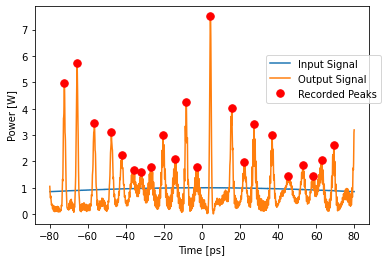

In [171]:
t=ssfm_result_test.timeFreq.t[int(ssfm_result_test.timeFreq.number_of_points/2-nrange_pulse):int(ssfm_result_test.timeFreq.number_of_points/2+nrange_pulse)]
plt.figure()
plt.plot(t*1e12,getPower(   testInputSignal.amplitude[int(ssfm_result_test.timeFreq.number_of_points/2-nrange_pulse):int(ssfm_result_test.timeFreq.number_of_points/2+nrange_pulse)]   ),'C0',label='Input Signal')
plt.plot(t*1e12,P_final,'C1',label='Output Signal')
plt.plot(t[peak_indices]*1e12,peakPowers,'r.',markersize=15,label='Recorded Peaks')
plt.ylabel('Power [W]')
plt.xlabel('Time [ps]')
plt.legend(bbox_to_anchor=(1.05,0.8))
plt.show()

## Plot data

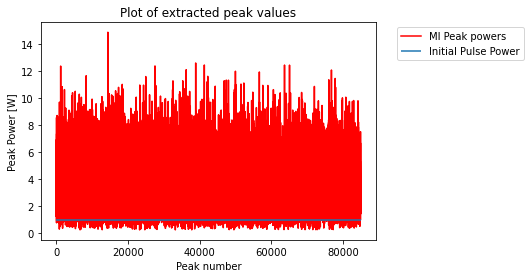

Highest peak power recorded = 14.848672564137273W


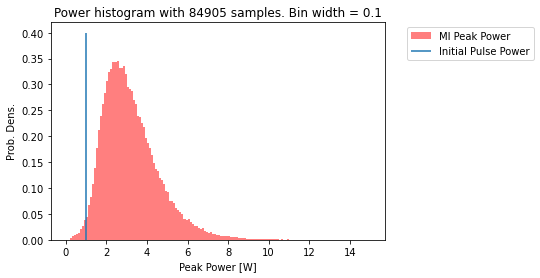

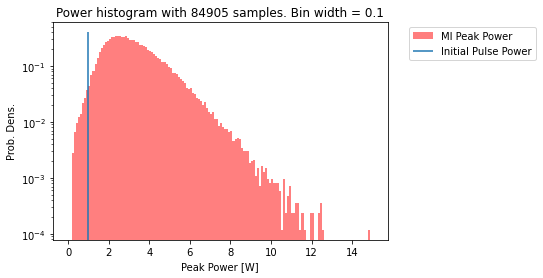

In [187]:
plt.figure()
plt.title('Plot of extracted peak values')
plt.plot(df,'r-',label="MI Peak powers")
plt.hlines( testAmplitude**2,0,len(df),label="Initial Pulse Power"  )
plt.ylabel('Peak Power [W]')
plt.xlabel('Peak number')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Pmax=df.max().max()
bins=np.linspace(0,np.ceil(Pmax),int(np.ceil(Pmax)*10+1))             
d_bins=bins[1]-bins[0]



print(f"Highest peak power recorded = {Pmax}W")
fig, ax = plt.subplots()
plt.title(f"Power histogram with {len(df)} samples. Bin width = {d_bins}")
ax.hist(df,bins,density=True,color='r',alpha=0.5,label='MI Peak Power')
ax.set_xlabel('Peak Power [W]')
ax.set_ylabel('Prob. Dens.')
ax.vlines( testAmplitude**2,0,0.4,label="Initial Pulse Power"  )
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

fig, ax = plt.subplots()
plt.title(f"Power histogram with {len(df)} samples. Bin width = {d_bins}")
ax.hist(df,bins,density=True,color='r',alpha=0.5,label='MI Peak Power')
ax.set_xlabel('Peak Power [W]')
ax.set_ylabel('Prob. Dens.')
ax.vlines( testAmplitude**2,0,0.4,label="Initial Pulse Power"  )
#ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Fit Gamma distribution to peak powers

$\Gamma_d(P,a,b)= \frac{P^{a-1}\exp(-P/b)}{\Gamma(a)b^a}$

C:\Users\okrarup\AppData\Local\Temp\ipykernel_11116\437777394.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return power_bin**(a-1)*np.exp(-power_bin/b)/gamma(a)/b**a


Gamma fit parameters:
 a-value = 5.909296896316863
 b-value ('Decay power') = 0.5237760316057631W
 
Gamma distribution properties:
 Most probable peak power = 2.571372046327336W
 Mean peak power = 3.095148077933099W
 Spread of peak power = 1.2732495346521844W
 
Smallest non-zero prob = 1.177786938342837e-05
 


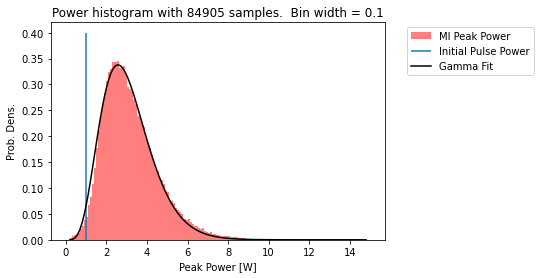

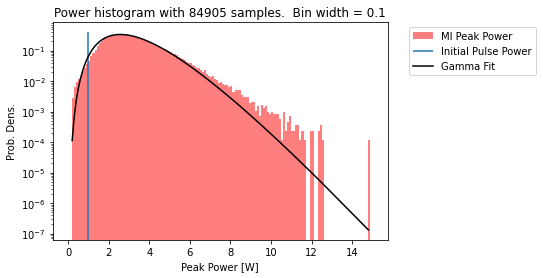

In [194]:
#Import libraries
from scipy.optimize import curve_fit
from scipy.special import gamma

#Get histogram data as numpy arrays
Pdens, bins_plot = np.histogram(df,bins,density=True)
bins_plot=bins_plot[0:-1]



#Remove bins with 0 occurences
threshold=0.0
idx_nonzero =np.where(Pdens>threshold)
Pdens = Pdens[idx_nonzero]
bins_plot = bins_plot[idx_nonzero]

#Define gamma distribution
def gamma_func(power_bin,a,b):
    #Gamma distribution: 
    # https://online.stat.psu.edu/stat414/lesson/15/15.4
    # https://en.wikipedia.org/wiki/Gamma_distribution
    return power_bin**(a-1)*np.exp(-power_bin/b)/gamma(a)/b**a


#Do fit and print parameters
params, param_cov = curve_fit(gamma_func, bins_plot, Pdens,p0=[3,4] )
print("Gamma fit parameters:")
print(f" a-value = {params[0]}")
print(f" b-value ('Decay power') = {params[1]}W")
print(' ')
print("Gamma distribution properties:")
print(f" Most probable peak power = {(params[0]-1)*params[1]}W")
print(f" Mean peak power = {(params[0])*params[1]}W")
print(f" Spread of peak power = {np.sqrt(params[0])*params[1]}W")
print(' ')
print(f"Smallest non-zero prob = {np.min(Pdens)*d_bins}")
print(' ')


#Plot fit
fig, ax = plt.subplots()
plt.title(f"Power histogram with {len(df)} samples.  Bin width = {d_bins}")
ax.hist(df,bins,density=True,color='r',alpha=0.5,label='MI Peak Power')
ax.vlines( testAmplitude**2,0,0.4,label="Initial Pulse Power"  )
ax.plot(bins_plot,gamma_func( bins_plot, params[0],params[1] ),'k-',label='Gamma Fit')
ax.set_xlabel('Peak Power [W]')
ax.set_ylabel('Prob. Dens.')
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

fig, ax = plt.subplots()
plt.title(f"Power histogram with {len(df)} samples.  Bin width = {d_bins}")
ax.hist(df,bins,density=True,color='r',alpha=0.5,label='MI Peak Power')
ax.vlines( testAmplitude**2,0,0.4,label="Initial Pulse Power"  )
ax.plot(bins_plot,gamma_func( bins_plot, params[0],params[1] ),'k-',label='Gamma Fit')
ax.set_xlabel('Peak Power [W]')
ax.set_ylabel('Prob. Dens.')
#ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
